# Wrapping gridded data around the globe
**Scott Wales, CLEX CMS**

How to fix blank gaps in plots at the meridian and poles

In [1]:
import numpy
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## The Dataset

We have some sample data, where the values are defined at grid centres. The lat coordinates start and end half a grid spacing from the poles

In [2]:
da = xarray.DataArray(numpy.random.random((10,10)),
                     coords=[
                         ('lat', numpy.linspace(-90,90,num=10, endpoint=False)+18/2),
                         ('lon', numpy.linspace(0,360,num=10, endpoint=False)),
                     ])

## pyplot.pcolormesh

If we try a basic mesh plot with matplotlib, we get blank spaces over the poles and over the meridian where the longitudes wrap around

pcolormesh wants to use the coordinates as the grid corners when plotting, while in our dataset we've actually got the grid centres

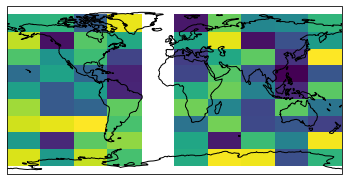

In [3]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.pcolormesh(da.lon, da.lat, da, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180,180,-90,90])

## xarray.plot

Xarray's plotting automatically knows our coordinates are grid centres, and works out the corner coordinates for us to plot the data accurately

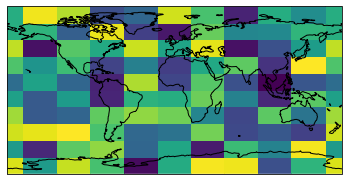

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
da.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
ax.coastlines()
ax.set_extent([-180,180,-90,90])

## Manually finding corners

We can also manually find the corners - `numpy.diff` finds the difference between consecutive values in a numpy array, assuming our data is on a regular grid (and so the spacing is the same between all grid cells) we can use this to find the corner coordinates and pass those corners to `pcolormesh`

In [5]:
dlat = numpy.diff(da.lat)[0]
corner_lat = numpy.concatenate([da.lat - dlat/2, da.lat[-1:] + dlat/2])
corner_lat

array([-90., -72., -54., -36., -18.,   0.,  18.,  36.,  54.,  72.,  90.])

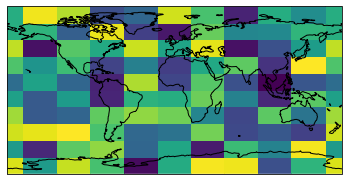

In [6]:
dlon = numpy.diff(da.lon)[0]
corner_lon = numpy.concatenate([da.lon - dlon/2, da.lon[-1:] + dlon/2])

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.pcolormesh(corner_lon, corner_lat, da, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180,180,-90,90])